## <center> <font color='purple'> Comparison Diagram - DES with Single ML Models</font></center> 
#### <center>Firuz Juraev (Sungkyunkwan Unniversity)</center>

#### <center><font color='red'> Keywords: Single, DES, Mortality Prediction, Classification, Comparison, Barchart, Critical Diagram </font></center>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
import numpy as np 
sns.set()

#### <font color='blue'>Libraries for Critical Diagram 

In [2]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks
from sklearn.metrics import mean_absolute_error

### <font color='purple'>Load Results 

In [3]:
des_3_models_results = pd.read_csv("static_pool_results/des_static_pool_3_models_results.csv")
des_4_models_results = pd.read_csv("static_pool_results/des_static_pool_results_4_models.csv")
des_5_models_results = pd.read_csv("static_pool_results/des_static_pool_5_models_results.csv")
des_6_models_results = pd.read_csv("static_pool_results/des_static_pool_6_models_results.csv")

In [4]:
def remove_rows(df): 
    indexNames = df[(df['method'] == 'FIRE-MCB') | (df['method'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df 

In [5]:
des_3_models_results = remove_rows(des_3_models_results)
des_4_models_results = remove_rows(des_4_models_results)
des_5_models_results = remove_rows(des_5_models_results)
des_6_models_results = remove_rows(des_6_models_results)

In [6]:
des_3_models_results.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.960750,2.832442e-03,0.955,0.95900,0.9610,0.96200,0.965
accuracy_std,12.0,0.002917,9.003366e-04,0.002,0.00200,0.0030,0.00300,0.005
precision,12.0,0.927500,4.926736e-03,0.918,0.92475,0.9285,0.92925,0.935
precision_std,12.0,0.005000,1.651446e-03,0.003,0.00400,0.0050,0.00500,0.009
recall,12.0,1.000000,0.000000e+00,1.000,1.00000,1.0000,1.00000,1.000
recall_std,12.0,0.000000,0.000000e+00,0.000,0.00000,0.0000,0.00000,0.000
f1_score,12.0,0.962333,2.806918e-03,0.957,0.96075,0.9630,0.96325,0.967
f1_std,12.0,0.002750,1.055290e-03,0.001,0.00200,0.0030,0.00300,0.005
auc,12.0,0.987667,7.784989e-04,0.986,0.98700,0.9880,0.98800,0.989
auc_std,12.0,0.001000,2.264824e-19,0.001,0.00100,0.0010,0.00100,0.001


In [7]:
des_4_models_results.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.954833,0.018135,0.932,0.93800,0.9575,0.97175,0.975
accuracy_std,12.0,0.007333,0.006513,0.001,0.00175,0.0065,0.01100,0.020
precision,12.0,0.951250,0.006703,0.938,0.94875,0.9530,0.95425,0.961
precision_std,12.0,0.002500,0.001087,0.001,0.00200,0.0020,0.00300,0.005
recall,12.0,0.959083,0.043777,0.907,0.91825,0.9710,1.00000,1.000
recall_std,12.0,0.012917,0.014576,0.000,0.00000,0.0100,0.02175,0.041
f1_score,12.0,0.954417,0.019275,0.930,0.93675,0.9575,0.97250,0.975
f1_std,12.0,0.007833,0.006952,0.001,0.00175,0.0070,0.01250,0.021
auc,12.0,0.982000,0.007746,0.964,0.97700,0.9855,0.98725,0.988
auc_std,12.0,0.003583,0.006230,0.000,0.00000,0.0005,0.00350,0.017


In [8]:
des_5_models_results.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.947333,0.026074,0.906,0.93125,0.9530,0.96850,0.976
accuracy_std,12.0,0.012167,0.002887,0.010,0.01000,0.0100,0.01400,0.018
precision,12.0,0.958750,0.011522,0.938,0.94825,0.9630,0.96800,0.971
precision_std,12.0,0.001833,0.000389,0.001,0.00200,0.0020,0.00200,0.002
recall,12.0,0.936250,0.063899,0.842,0.89125,0.9550,0.99400,0.994
recall_std,12.0,0.024250,0.005545,0.020,0.02000,0.0205,0.02800,0.036
f1_score,12.0,0.945750,0.028854,0.900,0.92850,0.9525,0.96950,0.976
f1_std,12.0,0.013250,0.003467,0.010,0.01000,0.0115,0.01600,0.019
auc,12.0,0.977000,0.017189,0.943,0.97425,0.9855,0.98800,0.989
auc_std,12.0,0.005000,0.009025,0.000,0.00000,0.0005,0.00375,0.025


In [9]:
des_6_models_results.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.953917,0.021547,0.928,0.93575,0.9530,0.97325,0.980
accuracy_std,12.0,0.009583,0.009070,0.001,0.00100,0.0080,0.01625,0.023
precision,12.0,0.958833,0.010223,0.942,0.95000,0.9610,0.96525,0.972
precision_std,12.0,0.002000,0.000853,0.001,0.00100,0.0020,0.00300,0.003
recall,12.0,0.949167,0.053250,0.888,0.90100,0.9515,1.00000,1.000
recall_std,12.0,0.017667,0.019317,0.000,0.00000,0.0140,0.03150,0.046
f1_score,12.0,0.952750,0.023266,0.924,0.93300,0.9525,0.97400,0.980
f1_std,12.0,0.010500,0.010149,0.001,0.00100,0.0090,0.01825,0.025
auc,12.0,0.984000,0.008718,0.964,0.98225,0.9880,0.98925,0.991
auc_std,12.0,0.004000,0.007604,0.000,0.00000,0.0005,0.00200,0.020


### <font color='purple'> Bar Chart 

In [10]:
labels = ['3 classifiers', '4 classifiers', '5 classifiers', '6 classifiers']

accuracy_means = [des_3_models_results.accuracy.mean(), 
                  des_4_models_results.accuracy.mean(), 
                  des_5_models_results.accuracy.mean(),
                  des_6_models_results.accuracy.mean(),]

precision_means = [des_3_models_results.precision.mean(), 
                   des_4_models_results.precision.mean(), 
                   des_5_models_results.precision.mean(),
                   des_6_models_results.precision.mean()]

recall_means =   [des_3_models_results.recall.mean(), 
                  des_4_models_results.recall.mean(), 
                  des_5_models_results.recall.mean(),
                  des_6_models_results.recall.mean()]

f1_score_means = [des_3_models_results.f1_score.mean(), 
                  des_4_models_results.f1_score.mean(), 
                  des_5_models_results.f1_score.mean(),
                  des_6_models_results.f1_score.mean()]

auc_score_means = [des_3_models_results.auc.mean(), 
                   des_4_models_results.auc.mean(), 
                   des_5_models_results.auc.mean(),
                   des_6_models_results.auc.mean()]

In [11]:
row_names = ['Accuracy', "Precision", 'Recall', 'F1', 'AUC']

results = {'Number of classifiers': labels, 
          'accuracy': accuracy_means, 
          'precision': precision_means, 
          'recall': recall_means, 
          'f1': f1_score_means, 
          'auc': auc_score_means}

In [12]:
resultsDF = pd.DataFrame.from_dict(results)

In [13]:
resultsDF

,Number of classifiers,accuracy,precision,recall,f1,auc
0,3 classifiers,0.960750,0.927500,1.000000,0.962333,0.987667
1,4 classifiers,0.954833,0.951250,0.959083,0.954417,0.982000
2,5 classifiers,0.947333,0.958750,0.936250,0.945750,0.977000
3,6 classifiers,0.953917,0.958833,0.949167,0.952750,0.984000


In [14]:
resultsDF.rename(columns={"accuracy": "Accuracy", "precision": "Precision", 
                          "recall":"Recall", "f1": "F1 score", "auc": "AUC"}, inplace=True)

In [15]:
resultsDF.set_index('Number of classifiers', inplace=True)

In [16]:
sns.set(rc={'figure.figsize':(9,5)})
sns.set_style("whitegrid")

(0.5, 1.0)

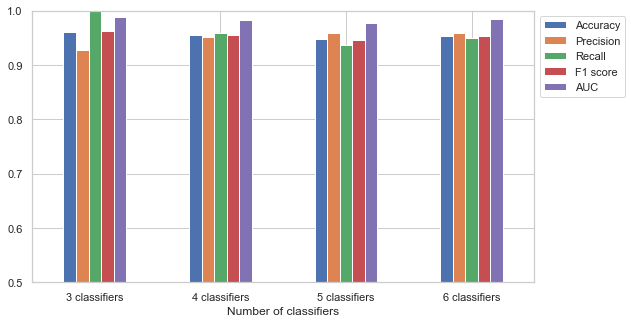

In [17]:
ax = resultsDF.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.5, 1)

### <font color='purple'> Bar Chart for best Pool

In [18]:
des_3_models_results.drop(['accuracy_std', 'precision_std', 'recall_std', 'f1_std', 'auc_std'], axis=1, inplace=True)

In [19]:
des_3_models_results.rename(columns={"accuracy": "Accuracy", "precision": "Precision", 
                          "recall":"Recall", "f1_score": "F1", "auc": "AUC"}, inplace=True)

In [20]:
des_3_models_results

,method,Accuracy,Precision,Recall,F1,AUC
0,FIRE-KNORA-U,0.959,0.925,1.0,0.961,0.988
1,KNORA-U,0.959,0.924,1.0,0.960,0.987
2,FIRE-KNORA-E,0.962,0.929,1.0,0.963,0.988
3,KNORA-E,0.962,0.930,1.0,0.964,0.988
4,FIRE-METADES,0.965,0.935,1.0,0.966,0.988
5,METADES,0.965,0.935,1.0,0.967,0.989
6,FIRE-DESKNN,0.955,0.918,1.0,0.957,0.986
7,DESKNN,0.958,0.922,1.0,0.959,0.987
10,FIRE-DESP,0.961,0.928,1.0,0.963,0.988
11,DESP,0.961,0.929,1.0,0.963,0.988


In [21]:
des_3_models_results.set_index('method',inplace=True)

In [22]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")

(0.0, 1.0)

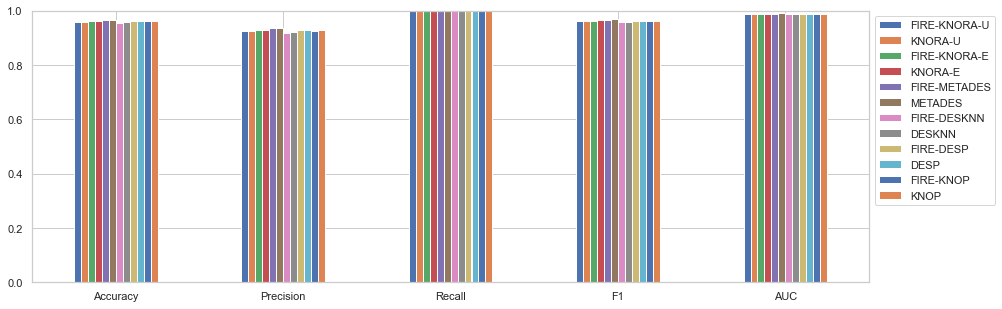

In [23]:
ax = des_3_models_results.T.plot.bar(rot=0, legend=True)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.0, 1)

### <font color='purple'> ROC Curve 

In [24]:
def remove_rows(df): 
    indexNames = df[(df['method'] == 'FIRE-MCB') | (df['method'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df 

In [25]:
results_ROC = pd.read_csv("static_pool_results/des_static_pool_results_3_table_for_ROC.csv")

In [26]:
names = ['FIRE-KNORA-U',
         'KNORA-U',
         'FIRE-KNORA-E',
         'KNORA-E',
         'FIRE-METADES',
         'METADES',
         'FIRE-DESKNN',
         'DESKNN',
         'FIRE-MCB', 
         'MCB', 
         'FIRE-DESP',
         'DESP',
         'FIRE-KNOP',
         'KNOP']

results_ROC['method'] = names

In [27]:
results_ROC = remove_rows(results_ROC)

In [28]:
results_ROC.set_index('method', inplace=True)

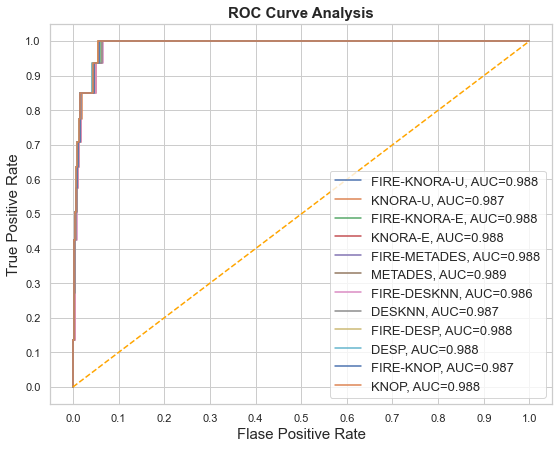

In [29]:
fig = plt.figure(figsize=(9,7))
sns.set_style("whitegrid")
for i in results_ROC.index:
    plt.plot(ast.literal_eval(re.sub("\s+", ",", results_ROC.loc[i]['fpr'].strip())), 
             ast.literal_eval(re.sub("\s+", ",", results_ROC.loc[i]['tpr'].strip())), 
             label="{}, AUC={:.3f}".format(i, results_ROC.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### <font color='purple'>Critical Diagram 

In [30]:
def remove_rows(df): 
    indexNames = df[(df['models'] == 'FIRE-MCB') | (df['models'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df

In [31]:
results_CD = pd.read_csv("static_pool_results/des_static_pool_results_3_extend_for_CD.csv")

In [32]:
results_CD = remove_rows(results_CD)

In [33]:
def compare_results(results, lst_models):      
        fried_result = friedmanchisquare(*results)
        
        ranks = np.array([rankdata(-p) for p in results])
        
        # Calculating the average ranks.
        average_ranks = np.mean(ranks, axis=0)

        names = [lst_models[i] + ' - ' + str(round(average_ranks[i], 3)) for i in range(len(average_ranks))]
        
        # This method computes the critical difference for Nemenyi test with alpha=0.1.
        # For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
        cd = compute_CD(average_ranks, n=len(results),alpha='0.05', test='nemenyi')
        
        return fried_result, ranks, names, cd , average_ranks

In [34]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
    plt.title(f'Friedman-Nemenyi={round(fried_result.pvalue, 4)}\nCD={round(cd, 3)}')
    plt.show()
    
    return

In [35]:
names = ["FIRE-KNORA-U", "KNORA-U", "FIRE-KNORA-E", "KNORA-E", "FIRE-METADES", "METADES",
         "FIRE-DESKNN", "DESKNN", "FIRE-DESP", "DESP", "FIRE-KNOP", "KNOP"]

dct_results = {}

for n in names:
    res = ast.literal_eval(results_CD[results_CD.models == n].accuracy.to_list()[0])
    dct_results[n] = res
    
results = np.c_[dct_results['FIRE-KNORA-U'], dct_results['KNORA-U'], dct_results['FIRE-KNORA-E'], 
                dct_results['KNORA-E'], dct_results['FIRE-METADES'], dct_results['METADES'], 
                dct_results['FIRE-DESKNN'], dct_results['DESKNN'], dct_results['FIRE-DESP'], 
                dct_results['DESP'], dct_results['FIRE-KNOP'], dct_results['KNOP']]

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

In [39]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
    plt.title(f'Friedman-Nemenyi < 0.001 \nCD={round(cd, 3)}')
    plt.show()
    
    return

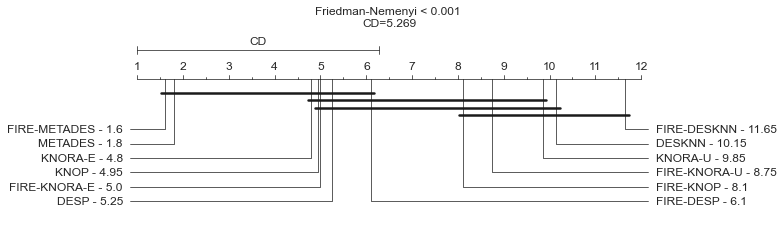

In [40]:
plot_comparisons(fried_result, names, cd, average_ranks)